In [1]:
from pathlib import Path

import util
from util import workflow

browser = False
file = util.notebook_file() if util.is_notebook() else __file__
tag = util.file_tag(file)
root_path = Path("..")

In [2]:
from util import p_

import automech

mech0 = automech.io.read(
    p_.original_mechanism(tag, ext="json", path=p_.data(root_path))
)
mech = automech.io.read(
    p_.mechanism(tag, ext="json", path=p_.data(root_path))
)
print(automech.reaction_count(mech0))
print(automech.reaction_count(mech))

automech.display(mech)

30
58


In [9]:
from automech.reaction import Reaction

rcts_lst = mech.reactions.get_column(Reaction.reactants).to_list()
prds_lst = mech.reactions.get_column(Reaction.products).to_list()
rxns = list(zip(rcts_lst, prds_lst, strict=True))


def flip(name: str) -> str:
    if name.endswith("0"):
        return name[:-1] + "1"
    if name.endswith("1"):
        return name[:-1] + "0"
    return name


uniq_rxns = []
for rxn in rxns:
    rcts, prds = rxn
    is_enant = any(str.endswith(s, ("0", "1")) for s in rcts + prds)
    if not is_enant:
        uniq_rxns.append(rxn)
    else:
        # Flip
        rcts = list(map(flip, rcts))
        prds = list(map(flip, prds))
        flip_rxn = (rcts, prds)

        if flip_rxn not in uniq_rxns:
            uniq_rxns.append(rxn)

print(uniq_rxns)
print(len(uniq_rxns))

[(['C5H7(487)e'], ['C5H7(504)']), (['C5H7(507)zz'], ['C5H7(500)']), (['C5H7O(758)rs0'], ['C5H7O(746)r0']), (['C5H7O(758)rs0'], ['C5H7O(762)']), (['S(1565)rs0'], ['C5H7O(758)rs1']), (['S(1512)r0'], ['S(1289)rs']), (['S(1206)r0'], ['HO2(8)', 'C5H6(478)']), (['O2(6)', 'C5H7(500)'], ['S(1206)r0']), (['S(602)'], ['C5H6(478)', 'HO2(8)']), (['C5H7(504)', 'O2(6)'], ['S(602)']), (['S(1690)rrr0'], ['HO2(8)', 'S(1288)rs1']), (['O2(6)', 'C5H7O(758)rs1'], ['S(1690)rrr0']), (['S(1690)rsr0'], ['HO2(8)', 'S(1288)rs1']), (['O2(6)', 'C5H7O(758)rs1'], ['S(1690)rsr0']), (['S(1691)rrs'], ['HO2(8)', 'S(1288)rs0']), (['O2(6)', 'S(1289)rs'], ['S(1691)rrs']), (['S(1691)srs'], ['HO2(8)', 'S(1288)rs0']), (['O2(6)', 'S(1289)rs'], ['S(1691)srs']), (['C5H8(522)', 'OH(4)'], ['C5H7(1202)', 'H2O(5)']), (['C5H8(522)', 'OH(4)'], ['C5H7(500)', 'H2O(5)']), (['C5H8(522)', 'OH(4)'], ['C5H7(504)', 'H2O(5)']), (['S(722)r0'], ['C5H8(522)', 'HO2(8)']), (['S(722)r0'], ['C5H8O(825)rs', 'OH(4)']), (['C5H8(522)', 'HO2(8)'], ['C5H7(

In [2]:
# # Build
# from util import p_

# import automech

# sub_tags = [
#     "A_rh-oh_p1v0",
#     "B_rh-ho2_p1v0",
#     "B_rh-ho2_p2v0",
#     "C_r_p1v0",
#     "C_r_p2v0",
#     # "C_r_p3v0",  # Not included due to error
#     "D_r-o2_p1v0",
#     "D_r-o2_p2v0",
#     "D_r-o2_p3v0",
# ]
# sub_paths = [p_.original_mechanism(t, "json", p_.data(root_path)) for t in sub_tags]
# sub_mechs = [automech.io.read(p) for p in sub_paths]
# mech = automech.combine_all(sub_mechs)
# mech = automech.drop_duplicate_reactions(mech)
# automech.display(mech)

In [3]:
# # Write
# workflow.write(mech=mech, tag=tag, root_path=root_path, browser=browser)

In [4]:
# # Read
# workflow.prepare_simulation(tag=tag, root_path=root_path)

name: C5H8(522)
smiles: C1=CCCC1


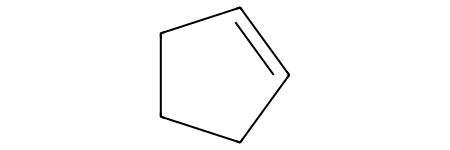

alt.LayerChart(...)

name: C5H8O(825)rs
smiles: C1C[C@H]2[C@@H](C1)O2


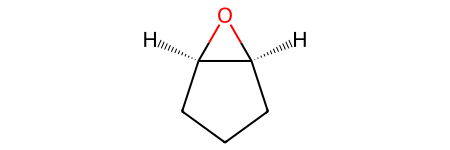

alt.LayerChart(...)

name: CPT(563)
smiles: C1CCCC1


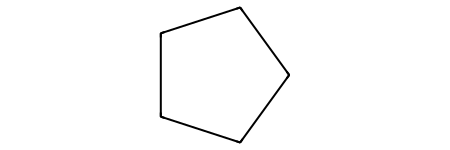

alt.LayerChart(...)

name: O2(6)
smiles: O=O


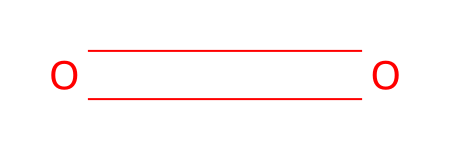

alt.LayerChart(...)

name: H2(2)
smiles: [H][H]


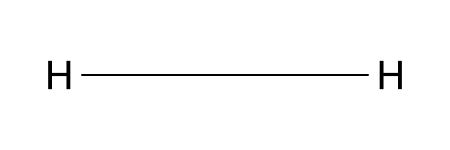

alt.LayerChart(...)

name: H2O(5)
smiles: O


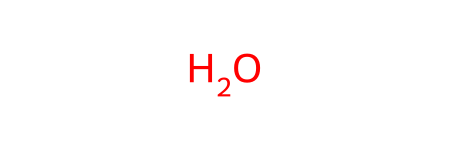

alt.LayerChart(...)

name: CO(12)
smiles: O=[C]


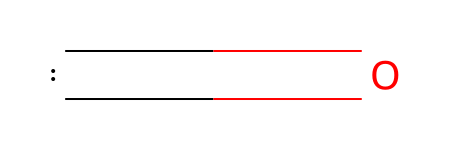

alt.LayerChart(...)

name: CO2(13)
smiles: O=C=O


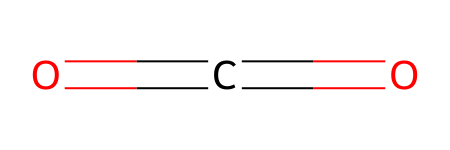

alt.LayerChart(...)

name: CH4(33)
smiles: C


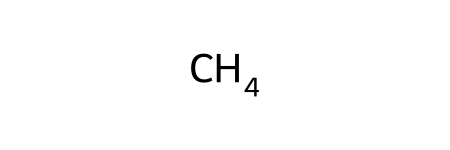

alt.LayerChart(...)

name: CH3CHO(41)
smiles: O=CC


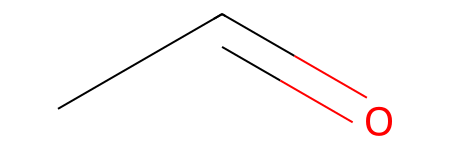

alt.LayerChart(...)

name: C2H4(52)
smiles: C=C


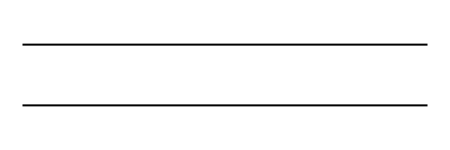

alt.LayerChart(...)

name: C3H6(131)
smiles: CC=C


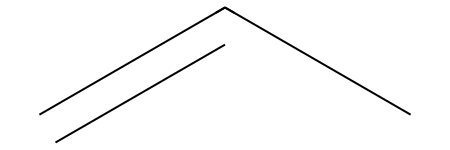

alt.LayerChart(...)

name: C3H4O(165)
smiles: O=CC=C


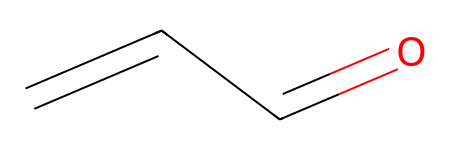

alt.LayerChart(...)

name: C4H6(227)
smiles: C=CC=C


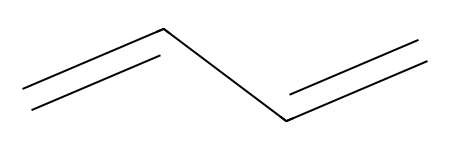

alt.LayerChart(...)

name: C4H8(253)
smiles: CCC=C


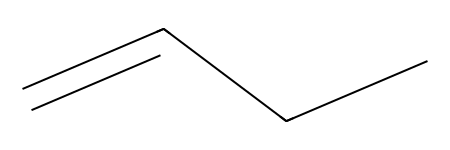

alt.LayerChart(...)

name: C5H6(478)
smiles: C=1C=CCC=1


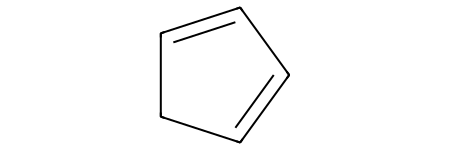

alt.LayerChart(...)

name: C6H6(970)
smiles: C1=CC=CC=C1


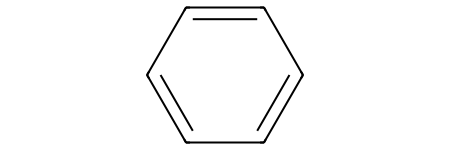

alt.LayerChart(...)

In [5]:
from util import p_

import automech

# Plot
chart_dct = workflow.plot_simulation(
    tag=tag,
    x_col="O2_molecules",
    root_path=root_path,
    line_source_=["Hill", "Lokachari"],
    point_source="Experiment",
    control=False,
)
mech = automech.io.read(
    p_.full_calculated_mechanism(tag, "json", path=p_.data(root_path))
)
for name, chart in chart_dct.items():
    automech.display_species(mech, [name])
    chart.show()

In [6]:
# Write
workflow.plot_rates(tag=tag, root_path=root_path)


Reading mechanisms...

Compare calculated mechanism to parent mechanism...

*********
Reaction: S(1690)rsr1 = HO2(8) + S(1288)rs0
Translations:
  smiles:
    reactants = ['[O]O[C@H]1CC[C@@H]2[C@H]1O2']
    products = ['[O]O', 'C1=C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    S(1690)rsr1 = HO2(8) + S(1288)rs0                            1.000      0.000      0.000
        PLOG  /     0.1000  3.733E+63     -17.14      44088/
        PLOG  /      1.000  6.983E+63     -16.72      46520/
        PLOG  /      10.00  1.828E+55     -13.62      45719/
        PLOG  /      100.0  1.564E+42     -9.257      42683/
  Hill:
    S(1690) = HO2(8) + S(1288)                              3300000000      1.010      29600


alt.Chart(...)


*********
Reaction: O2(6) + C5H7O(758)rs0 = S(1690)rsr1
Translations:
  smiles:
    reactants = ['O=O', '[CH]1CC[C@@H]2[C@H]1O2']
    products = ['[O]O[C@H]1CC[C@@H]2[C@H]1O2']
Rate parameters:
  This work:
    O2(6) + C5H7O(758)rs0 = S(1690)rsr1                          1.000      0.000      0.000
        PLOG  /     0.1000  5.860E+69     -18.77      16033/
        PLOG  /      1.000  2.648E+63     -16.39      15723/
        PLOG  /      10.00  9.556E+52     -12.82      13740/
        PLOG  /      100.0  7.320E+40     -8.843      10557/
  Hill:
    O2(6) + C5H7O(758) = S(1690)                             7.574E+12    -0.1290      0.000


alt.Chart(...)


*********
Reaction: C5H7(487)e = C5H7(504)
Translations:
  smiles:
    reactants = ['[H]/[C]=C/CC=C']
    products = ['C1=CC[CH]C1']
Rate parameters:
  This work:
    C5H7(487)e = C5H7(504)                                   5.361E+24     -4.440      16460
  Hill:
    C5H7(487) = C5H7(504)                                        1.000      0.000      0.000
        PLOG  /   0.001000  5.540E+26     -8.105       2440/
        PLOG  /    0.01000  1.260E+32     -9.071       4720/
        PLOG  /     0.1000  2.170E+40     -10.77      10830/
        PLOG  /      1.000  2.960E+46     -11.84      17388/
        PLOG  /      10.00  9.720E+45     -11.03      21236/
        PLOG  /      100.0  1.020E+35     -7.312      19527/


alt.Chart(...)


*********
Reaction: S(594)rr1 = HO2(8) + S(1227)
Translations:
  smiles:
    reactants = ['[O]O[C@@H]1CCC[C@H]1O']
    products = ['[O]O', 'OC1=CCCC1']
Rate parameters:
  This work:
    S(594)rr1 = HO2(8) + S(1227)                                 1.000      0.000      0.000
        PLOG  /     0.1000  3.585E+70     -18.70      47938/
        PLOG  /      1.000  1.988E+60     -15.15      46239/
        PLOG  /      10.00  5.230E+45     -10.38      42324/
        PLOG  /      100.0  1.127E+32     -6.017      38027/
  Hill:
    S(594) = HO2(8) + S(1227)                                6.480E+10     0.5700      29900


alt.Chart(...)


*********
Reaction: S(594)rr1 = HO2(8) + S(1228)r0
Translations:
  smiles:
    reactants = ['[O]O[C@@H]1CCC[C@H]1O']
    products = ['[O]O', 'O[C@H]1C=CCC1']
Rate parameters:
  This work:
    S(594)rr1 = HO2(8) + S(1228)r0                               1.000      0.000      0.000
        PLOG  /     0.1000  9.605E+71     -19.07      48894/
        PLOG  /      1.000  1.094E+62     -15.60      47403/
        PLOG  /      10.00  2.281E+47     -10.78      43546/
        PLOG  /      100.0  2.027E+33     -6.290      39165/
  Hill:
    S(594) = HO2(8) + S(1228)                               3300000000      1.010      29600


alt.Chart(...)


*********
Reaction: C5H9O(852)r0 + O2(6) = S(594)rr1
Translations:
  smiles:
    reactants = ['O[C@H]1[CH]CCC1', 'O=O']
    products = ['[O]O[C@@H]1CCC[C@H]1O']
Rate parameters:
  This work:
    C5H9O(852)r0 + O2(6) = S(594)rr1                             1.000      0.000      0.000
        PLOG  /     0.1000  3.943E+72     -19.30      18724/
        PLOG  /      1.000  8.695E+61     -15.64      16819/
        PLOG  /      10.00  3.581E+46     -10.64      12487/
        PLOG  /      100.0  3.135E+33     -6.476       8335/
  Hill:
    C5H9O(852) + O2(6) = S(594)                              9.290E+12    -0.2000     -800.0


alt.Chart(...)


*********
Reaction: C5H7(507)zz = C5H7(500)
Translations:
  smiles:
    reactants = ['C=/C/C=\\C\\[CH2]']
    products = ['C1=CCC[CH]1']
Rate parameters:
  This work:
    C5H7(507)zz = C5H7(500)                                      1.000      0.000      0.000
        PLOG  /     0.1000  6.393E+44     -10.01      42333/
        PLOG  /      1.000  1.640E+64     -15.23      58508/
        PLOG  /      1.000  2.571E+40     -8.837      39449/
        PLOG  /      10.00  3.775E+57     -12.98      58960/
        PLOG  /      10.00  1.146E+31     -5.806      36764/
        PLOG  /      100.0  1.703E+24     -3.626      34609/
        PLOG  /      100.0  1.144E+48     -10.01      56938/
  Hill:
    C5H7(507) = C5H7(500)                                        1.000      0.000      0.000
        PLOG  /   0.001000  2.300E+58     -15.41      44473/
        PLOG  /    0.01000  7.530E+59     -15.36      48239/
        PLOG  /     0.1000  2.670E+62     -15.61      52958/
        PLOG  /      1.000  

alt.Chart(...)


*********
Reaction: C5H8O(825)rs + OH(4) = C5H7O(758)rs0 + H2O(5)
Translations:
  smiles:
    reactants = ['C1C[C@H]2[C@@H](C1)O2', '[OH]']
    products = ['[CH]1CC[C@@H]2[C@H]1O2', 'O']
Rate parameters:
  This work:
    C5H8O(825)rs + OH(4) = C5H7O(758)rs0 + H2O(5)              2340000      2.124      -1417
  Hill:
    C5H8O(825) + OH(4) = C5H7O(758) + H2O(5)                  33500000      1.779     -193.0


alt.Chart(...)


*********
Reaction: S(602) = C5H6(478) + HO2(8)
Translations:
  smiles:
    reactants = ['[O]OC1CC=CC1']
    products = ['C=1C=CCC=1', '[O]O']
Rate parameters:
  This work:
    S(602) = C5H6(478) + HO2(8)                                  1.000      0.000      0.000
        PLOG  /     0.1000  3.908E+57     -14.28      42092/
        PLOG  /      1.000  3.732E+48     -11.21      40348/
        PLOG  /      10.00  5.887E+35     -7.079      36583/
        PLOG  /      100.0  8.203E+24     -3.640      33002/
  Hill:
    S(602) = C5H6(478) + HO2(8)                                  1.000      0.000      0.000
        PLOG  /  0.0009870  4.430E+51     -13.04      37740/
        PLOG  /  0.0009870 1.720E+153     -49.36      53490/
        PLOG  /   0.009870  1.990E+46     -11.09      37240/
        PLOG  /   0.009870 2.240E+139     -44.21      51830/
        PLOG  /    0.09870  3.200E+46     -10.85      39140/
        PLOG  /    0.09870  1.090E+69     -19.71      38470/
        PLOG  /     0.

alt.Chart(...)


*********
Reaction: C5H7(504) + O2(6) = S(602)
Translations:
  smiles:
    reactants = ['C1=CC[CH]C1', 'O=O']
    products = ['[O]OC1CC=CC1']
Rate parameters:
  This work:
    C5H7(504) + O2(6) = S(602)                                   1.000      0.000      0.000
        PLOG  /     0.1000  3.894E+62     -16.08      15713/
        PLOG  /      1.000  6.512E+53     -13.03      14330/
        PLOG  /      10.00  1.778E+40     -8.636      10431/
        PLOG  /      100.0  6.538E+28     -5.010       6681/
  Hill:
    C5H7(504) + O2(6) = S(602)                                   1.000      0.000      0.000
        PLOG  /  0.0009870  1.030E+55     -14.41       8749/
        PLOG  /  0.0009870 4.100E+152     -40.95      93510/
        PLOG  /   0.009870  8.090E+65     -17.48      14080/
        PLOG  /   0.009870  1.080E+16     -2.060      -2824/
        PLOG  /    0.09870  3.230E+99     -27.43      30330/
        PLOG  /    0.09870  7.320E+32     -6.910       3690/
        PLOG  /     0.9

alt.Chart(...)


*********
Reaction: C5H7(504) + O2(6) = C5H6(478) + HO2(8)
Translations:
  smiles:
    reactants = ['C1=CC[CH]C1', 'O=O']
    products = ['C=1C=CCC=1', '[O]O']
Rate parameters:
  This work:
    C5H7(504) + O2(6) = C5H6(478) + HO2(8)                       1.000      0.000      0.000
        PLOG  /     0.1000  3.960E+32     -5.486      27252/
        PLOG  /     0.1000  3.147E+33     -6.520      11918/
        PLOG  /      1.000  7.060E+32     -5.443      31688/
        PLOG  /      1.000  5.578E+31     -5.808      13947/
        PLOG  /      10.00  1.500E+25     -3.659      14314/
        PLOG  /      100.0  9.775E+81     -22.45      30704/
        PLOG  /      100.0  1.032E+30     -4.863      21832/
  Hill:
    C5H7(504) + O2(6) = C5H6(478) + HO2(8)                       1.000      0.000      0.000
        PLOG  /  0.0009870  3.990E+27     -5.110       4757/
        PLOG  /  0.0009870  1.310E+88     -21.77      55910/
        PLOG  /   0.009870  1.960E+43     -9.890      12400/
     

alt.Chart(...)


*********
Reaction: C5H7O(758)rs0 = C5H7O(746)r0
Translations:
  smiles:
    reactants = ['[CH]1CC[C@@H]2[C@H]1O2']
    products = ['[O][C@H]1C=CCC1']
Rate parameters:
  This work:
    C5H7O(758)rs0 = C5H7O(746)r0                             7.518E+12    0.04700       3578
  Hill:
    C5H7O(758) = C5H7O(746)                                  1.000E+20     -1.700      23295


alt.Chart(...)


*********
Reaction: C5H7O(758)rs0 = C5H7O(762)
Translations:
  smiles:
    reactants = ['[CH]1CC[C@@H]2[C@H]1O2']
    products = ['C1=CO[CH]CC1']
Rate parameters:
  This work:
    C5H7O(758)rs0 = C5H7O(762)                               2.402E+12     0.2560      15539
  Hill:
    C5H7O(758) = C5H7O(762)                                      1.000      0.000      0.000
        PLOG  /     0.1000  1.300E+17     -2.000      26680/
        PLOG  /      1.000  1.400E+18     -2.000      28944/
        PLOG  /      10.00  1.600E+19     -2.000      31788/
        PLOG  /      100.0  3.100E+19     -1.800      34426/
        PLOG  /       1000  1.000E+20     -1.700      36940/


alt.Chart(...)


*********
Reaction: C5H7O(758)rs1 = C5H7O(762)
Translations:
  smiles:
    reactants = ['[CH]1CC[C@H]2[C@@H]1O2']
    products = ['C1=CO[CH]CC1']
Rate parameters:
  This work:
    C5H7O(758)rs1 = C5H7O(762)                               2.402E+12     0.2560      15539
  Hill:
    C5H7O(758) = C5H7O(762)                                      1.000      0.000      0.000
        PLOG  /     0.1000  1.300E+17     -2.000      26680/
        PLOG  /      1.000  1.400E+18     -2.000      28944/
        PLOG  /      10.00  1.600E+19     -2.000      31788/
        PLOG  /      100.0  3.100E+19     -1.800      34426/
        PLOG  /       1000  1.000E+20     -1.700      36940/


alt.Chart(...)


*********
Reaction: C5H7O(758)rs1 = C5H7O(746)r1
Translations:
  smiles:
    reactants = ['[CH]1CC[C@H]2[C@@H]1O2']
    products = ['[O][C@@H]1C=CCC1']
Rate parameters:
  This work:
    C5H7O(758)rs1 = C5H7O(746)r1                             7.518E+12    0.04700       3578
  Hill:
    C5H7O(758) = C5H7O(746)                                  1.000E+20     -1.700      23295


alt.Chart(...)


*********
Reaction: S(1565)rs0 = C5H7O(758)rs1
Translations:
  smiles:
    reactants = ['C=C[C@@H]1[C@H]([CH2])O1']
    products = ['[CH]1CC[C@H]2[C@@H]1O2']
Rate parameters:
  This work:
    S(1565)rs0 = C5H7O(758)rs1                               403800000     0.6800      14731
  Hill:
    S(1565) = C5H7O(758)                                     2.315E+10     0.4470      25212


alt.Chart(...)


*********
Reaction: S(1565)rs1 = C5H7O(758)rs0
Translations:
  smiles:
    reactants = ['C=C[C@H]1[C@@H]([CH2])O1']
    products = ['[CH]1CC[C@@H]2[C@H]1O2']
Rate parameters:
  This work:
    S(1565)rs1 = C5H7O(758)rs0                               403800000     0.6800      14731
  Hill:
    S(1565) = C5H7O(758)                                     2.315E+10     0.4470      25212


alt.Chart(...)


*********
Reaction: S(1691)srs = HO2(8) + S(1288)rs0
Translations:
  smiles:
    reactants = ['[O]O[C@@H]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O', 'C1=C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    S(1691)srs = HO2(8) + S(1288)rs0                             1.000      0.000      0.000
        PLOG  /     0.1000  9.329E+67     -17.96      47155/
        PLOG  /      1.000  1.083E+60     -15.10      46416/
        PLOG  /      10.00  2.372E+47     -10.88      43468/
        PLOG  /      100.0  4.287E+33     -6.459      39351/
  Hill:
    S(1691) = HO2(8) + S(1288)                              6600000000      1.010      29600


alt.Chart(...)


*********
Reaction: S(1691)srs = HO2(8) + S(1288)rs1
Translations:
  smiles:
    reactants = ['[O]O[C@@H]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O', 'C1=C[C@@H]2[C@H](C1)O2']
Rate parameters:
  This work:
    S(1691)srs = HO2(8) + S(1288)rs1                             1.000      0.000      0.000
        PLOG  /     0.1000  9.329E+67     -17.96      47155/
        PLOG  /      1.000  1.083E+60     -15.10      46416/
        PLOG  /      10.00  2.372E+47     -10.88      43468/
        PLOG  /      100.0  4.287E+33     -6.459      39351/
  Hill:
    S(1691) = HO2(8) + S(1288)                              6600000000      1.010      29600


alt.Chart(...)


*********
Reaction: O2(6) + S(1289)rs = S(1691)srs
Translations:
  smiles:
    reactants = ['O=O', '[CH]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O[C@@H]1C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + S(1289)rs = S(1691)srs                               1.000      0.000      0.000
        PLOG  /     0.1000  9.398E+68     -18.24      17122/
        PLOG  /      1.000  4.682E+60     -15.29      16065/
        PLOG  /      10.00  1.141E+47     -10.82      12494/
        PLOG  /      100.0  2.850E+34     -6.784       8625/
  Hill:
    O2(6) + S(1289) = S(1691)                                1.408E+13   -0.08700      0.000


alt.Chart(...)


*********
Reaction: C5H8O(825)rs + OH(4) = C5H7O(758)rs1 + H2O(5)
Translations:
  smiles:
    reactants = ['C1C[C@H]2[C@@H](C1)O2', '[OH]']
    products = ['[CH]1CC[C@H]2[C@@H]1O2', 'O']
Rate parameters:
  This work:
    C5H8O(825)rs + OH(4) = C5H7O(758)rs1 + H2O(5)              2340000      2.124      -1417
  Hill:
    C5H8O(825) + OH(4) = C5H7O(758) + H2O(5)                  33500000      1.779     -193.0


alt.Chart(...)


*********
Reaction: S(1691)rrs = HO2(8) + S(1288)rs0
Translations:
  smiles:
    reactants = ['[O]O[C@H]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O', 'C1=C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    S(1691)rrs = HO2(8) + S(1288)rs0                             1.000      0.000      0.000
        PLOG  /     0.1000  5.719E+64     -16.79      45438/
        PLOG  /      1.000  1.396E+55     -13.47      43821/
        PLOG  /      10.00  3.438E+43     -9.626      40982/
        PLOG  /      100.0  5.693E+30     -5.542      36996/
  Hill:
    S(1691) = HO2(8) + S(1288)                              6600000000      1.010      29600


alt.Chart(...)


*********
Reaction: S(1691)rrs = HO2(8) + S(1288)rs1
Translations:
  smiles:
    reactants = ['[O]O[C@H]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O', 'C1=C[C@@H]2[C@H](C1)O2']
Rate parameters:
  This work:
    S(1691)rrs = HO2(8) + S(1288)rs1                             1.000      0.000      0.000
        PLOG  /     0.1000  5.719E+64     -16.79      45438/
        PLOG  /      1.000  1.396E+55     -13.47      43821/
        PLOG  /      10.00  3.438E+43     -9.626      40982/
        PLOG  /      100.0  5.693E+30     -5.542      36996/
  Hill:
    S(1691) = HO2(8) + S(1288)                              6600000000      1.010      29600


alt.Chart(...)


*********
Reaction: O2(6) + S(1289)rs = S(1691)rrs
Translations:
  smiles:
    reactants = ['O=O', '[CH]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O[C@H]1C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + S(1289)rs = S(1691)rrs                               1.000      0.000      0.000
        PLOG  /     0.1000  8.023E+67     -17.83      17125/
        PLOG  /      1.000  1.320E+58     -14.45      15431/
        PLOG  /      10.00  1.492E+47     -10.81      12830/
        PLOG  /      100.0  2.127E+34     -6.718       8760/
  Hill:
    O2(6) + S(1289) = S(1691)                                1.408E+13   -0.08700      0.000


alt.Chart(...)


*********
Reaction: S(1690)rrr1 = HO2(8) + S(1288)rs0
Translations:
  smiles:
    reactants = ['[O]O[C@@H]1CC[C@@H]2[C@H]1O2']
    products = ['[O]O', 'C1=C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    S(1690)rrr1 = HO2(8) + S(1288)rs0                            1.000      0.000      0.000
        PLOG  /     0.1000  5.855E+65     -17.41      44318/
        PLOG  /      1.000  1.510E+60     -15.27      44373/
        PLOG  /      10.00  4.215E+50     -11.97      42768/
        PLOG  /      100.0  4.169E+36     -7.420      38803/
  Hill:
    S(1690) = HO2(8) + S(1288)                              3300000000      1.010      29600


alt.Chart(...)


*********
Reaction: O2(6) + C5H7O(758)rs0 = S(1690)rrr1
Translations:
  smiles:
    reactants = ['O=O', '[CH]1CC[C@@H]2[C@H]1O2']
    products = ['[O]O[C@@H]1CC[C@@H]2[C@H]1O2']
Rate parameters:
  This work:
    O2(6) + C5H7O(758)rs0 = S(1690)rrr1                          1.000      0.000      0.000
        PLOG  /     0.1000  2.519E+69     -18.56      16358/
        PLOG  /      1.000  3.563E+63     -16.35      16247/
        PLOG  /      10.00  7.709E+52     -12.72      14104/
        PLOG  /      100.0  7.745E+37     -7.898       9584/
  Hill:
    O2(6) + C5H7O(758) = S(1690)                             7.574E+12    -0.1290      0.000


alt.Chart(...)


*********
Reaction: S(722)r1 = C5H8(522) + HO2(8)
Translations:
  smiles:
    reactants = ['OO[C@@H]1[CH]CCC1']
    products = ['C1=CCCC1', '[O]O']
Rate parameters:
  This work:
    S(722)r1 = C5H8(522) + HO2(8)                            9.423E+12      0.000      14622
  Hill:
    S(722) = C5H8(522) + HO2(8)                                  1.000      0.000      0.000
        PLOG  /  0.0009870  1.160E+10     0.2500      18810/
        PLOG  /  0.0009870  3.200E+42     -9.300      34890/
        PLOG  /   0.009870  8.010E+14     -1.060      20210/
        PLOG  /   0.009870  4.070E+34     -6.510      32930/
        PLOG  /    0.09870  4.260E-07      6.110      14280/
        PLOG  /    0.09870  1.680E-33      13.44       2462/
        PLOG  /     0.9870  1.010E+39     -9.820      19290/
        PLOG  /     0.9870      1.920      4.000      15010/
        PLOG  /      9.870  6.240E+30     -6.270      19030/
        PLOG  /      9.870  1.360E+22     -2.540      24490/
        PLOG  /  

alt.Chart(...)


*********
Reaction: S(722)r1 = C5H8O(825)rs + OH(4)
Translations:
  smiles:
    reactants = ['OO[C@@H]1[CH]CCC1']
    products = ['C1C[C@H]2[C@@H](C1)O2', '[OH]']
Rate parameters:
  This work:
    S(722)r1 = C5H8O(825)rs + OH(4)                          2.225E+12      0.000       9076
  Hill:
    S(722) = C5H8O(825) + OH(4)                                  1.000      0.000      0.000
        PLOG  /  0.0009870      96.20      2.050       3050/
        PLOG  /  0.0009870  4.840E+35     -7.840      19690/
        PLOG  /   0.009870  1.290E+13     -1.370       5946/
        PLOG  /   0.009870  2.230E+38     -8.490      20330/
        PLOG  /    0.09870  3.220E+22     -4.170       8727/
        PLOG  /    0.09870  2.120E+32     -6.320      18790/
        PLOG  /     0.9870  1.280E+25     -4.670      10250/
        PLOG  /     0.9870  4.000E+24     -3.630      17390/
        PLOG  /      9.870  9.850E+17     -2.010       9428/
        PLOG  /      9.870  1.220E+79     -19.63      47130/
  

alt.Chart(...)


*********
Reaction: C5H8(522) + HO2(8) = C5H8O(825)rs + OH(4)
Translations:
  smiles:
    reactants = ['C1=CCCC1', '[O]O']
    products = ['C1C[C@H]2[C@@H](C1)O2', '[OH]']
Rate parameters:
  This work:
    C5H8(522) + HO2(8) = C5H8O(825)rs + OH(4)                 63180000      1.218      10502
  Hill:
    C5H8(522) + HO2(8) = C5H8O(825) + OH(4)                      1.000      0.000      0.000
        PLOG  /  0.0009870  6.250E+19     -2.220      18570/
        PLOG  /  0.0009870  107000000      1.050      10300/
        PLOG  /   0.009870  1.120E+19     -2.010      18020/
        PLOG  /   0.009870  150000000     0.9900      10300/
        PLOG  /    0.09870  1.580E+18     -1.770      17450/
        PLOG  /    0.09870  152000000     0.9800      10270/
        PLOG  /     0.9870  2.960E+18     -1.860      17720/
        PLOG  /     0.9870  497000000     0.8500      10600/
        PLOG  /      9.870  7.480E+11    0.08000      13430/
        PLOG  /      9.870 3630000000     0.4100      

alt.Chart(...)


*********
Reaction: S(594)rs0 = HO2(8) + S(1228)r1
Translations:
  smiles:
    reactants = ['[O]O[C@@H]1CCC[C@@H]1O']
    products = ['[O]O', 'O[C@@H]1C=CCC1']
Rate parameters:
  This work:
    S(594)rs0 = HO2(8) + S(1228)r1                           2.314E+50     -12.07      39178
  Hill:
    S(594) = HO2(8) + S(1228)                               3300000000      1.010      29600


alt.Chart(...)


*********
Reaction: C5H9O(852)r1 + O2(6) = S(594)rs0
Translations:
  smiles:
    reactants = ['O[C@@H]1[CH]CCC1', 'O=O']
    products = ['[O]O[C@@H]1CCC[C@@H]1O']
Rate parameters:
  This work:
    C5H9O(852)r1 + O2(6) = S(594)rs0                             1.000      0.000      0.000
        PLOG  /     0.1000  1.941E+71     -18.86      18420/
        PLOG  /      1.000  1.002E+60     -15.01      16248/
        PLOG  /      10.00  1.675E+44     -9.902      11697/
        PLOG  /      100.0  2.301E+28     -4.902       6274/
  Hill:
    C5H9O(852) + O2(6) = S(594)                              9.290E+12    -0.2000     -800.0


alt.Chart(...)


*********
Reaction: S(594)rs1 = HO2(8) + S(1228)r0
Translations:
  smiles:
    reactants = ['[O]O[C@H]1CCC[C@H]1O']
    products = ['[O]O', 'O[C@H]1C=CCC1']
Rate parameters:
  This work:
    S(594)rs1 = HO2(8) + S(1228)r0                           2.314E+50     -12.07      39178
  Hill:
    S(594) = HO2(8) + S(1228)                               3300000000      1.010      29600


alt.Chart(...)


*********
Reaction: C5H9O(852)r0 + O2(6) = S(594)rs1
Translations:
  smiles:
    reactants = ['O[C@H]1[CH]CCC1', 'O=O']
    products = ['[O]O[C@H]1CCC[C@H]1O']
Rate parameters:
  This work:
    C5H9O(852)r0 + O2(6) = S(594)rs1                             1.000      0.000      0.000
        PLOG  /     0.1000  1.941E+71     -18.86      18420/
        PLOG  /      1.000  1.002E+60     -15.01      16248/
        PLOG  /      10.00  1.675E+44     -9.902      11697/
        PLOG  /      100.0  2.301E+28     -4.902       6274/
  Hill:
    C5H9O(852) + O2(6) = S(594)                              9.290E+12    -0.2000     -800.0


alt.Chart(...)


*********
Reaction: C5H8(522) + OH(4) = C5H7(500) + H2O(5)
Translations:
  smiles:
    reactants = ['C1=CCCC1', '[OH]']
    products = ['C1=CCC[CH]1', 'O']
Rate parameters:
  This work:
    C5H8(522) + OH(4) = C5H7(500) + H2O(5)                     5078000      1.974      -1938
  Hill:
    C5H8(522) + OH(4) = C5H7(500) + H2O(5)                     4040000      2.200     -437.0


alt.Chart(...)


*********
Reaction: S(594)rr0 = HO2(8) + S(1227)
Translations:
  smiles:
    reactants = ['[O]O[C@H]1CCC[C@@H]1O']
    products = ['[O]O', 'OC1=CCCC1']
Rate parameters:
  This work:
    S(594)rr0 = HO2(8) + S(1227)                                 1.000      0.000      0.000
        PLOG  /     0.1000  3.585E+70     -18.70      47938/
        PLOG  /      1.000  1.988E+60     -15.15      46239/
        PLOG  /      10.00  5.230E+45     -10.38      42324/
        PLOG  /      100.0  1.127E+32     -6.017      38027/
  Hill:
    S(594) = HO2(8) + S(1227)                                6.480E+10     0.5700      29900


alt.Chart(...)


*********
Reaction: S(594)rr0 = HO2(8) + S(1228)r1
Translations:
  smiles:
    reactants = ['[O]O[C@H]1CCC[C@@H]1O']
    products = ['[O]O', 'O[C@@H]1C=CCC1']
Rate parameters:
  This work:
    S(594)rr0 = HO2(8) + S(1228)r1                               1.000      0.000      0.000
        PLOG  /     0.1000  9.605E+71     -19.07      48894/
        PLOG  /      1.000  1.094E+62     -15.60      47403/
        PLOG  /      10.00  2.281E+47     -10.78      43546/
        PLOG  /      100.0  2.027E+33     -6.290      39165/
  Hill:
    S(594) = HO2(8) + S(1228)                               3300000000      1.010      29600


alt.Chart(...)


*********
Reaction: C5H9O(852)r1 + O2(6) = S(594)rr0
Translations:
  smiles:
    reactants = ['O[C@@H]1[CH]CCC1', 'O=O']
    products = ['[O]O[C@H]1CCC[C@@H]1O']
Rate parameters:
  This work:
    C5H9O(852)r1 + O2(6) = S(594)rr0                             1.000      0.000      0.000
        PLOG  /     0.1000  3.943E+72     -19.30      18724/
        PLOG  /      1.000  8.695E+61     -15.64      16819/
        PLOG  /      10.00  3.581E+46     -10.64      12487/
        PLOG  /      100.0  3.135E+33     -6.476       8335/
  Hill:
    C5H9O(852) + O2(6) = S(594)                              9.290E+12    -0.2000     -800.0


alt.Chart(...)


*********
Reaction: S(1690)rrr0 = HO2(8) + S(1288)rs1
Translations:
  smiles:
    reactants = ['[O]O[C@H]1CC[C@H]2[C@@H]1O2']
    products = ['[O]O', 'C1=C[C@@H]2[C@H](C1)O2']
Rate parameters:
  This work:
    S(1690)rrr0 = HO2(8) + S(1288)rs1                            1.000      0.000      0.000
        PLOG  /     0.1000  5.855E+65     -17.41      44318/
        PLOG  /      1.000  1.510E+60     -15.27      44373/
        PLOG  /      10.00  4.215E+50     -11.97      42768/
        PLOG  /      100.0  4.169E+36     -7.420      38803/
  Hill:
    S(1690) = HO2(8) + S(1288)                              3300000000      1.010      29600


alt.Chart(...)


*********
Reaction: O2(6) + C5H7O(758)rs1 = S(1690)rrr0
Translations:
  smiles:
    reactants = ['O=O', '[CH]1CC[C@H]2[C@@H]1O2']
    products = ['[O]O[C@H]1CC[C@H]2[C@@H]1O2']
Rate parameters:
  This work:
    O2(6) + C5H7O(758)rs1 = S(1690)rrr0                          1.000      0.000      0.000
        PLOG  /     0.1000  2.519E+69     -18.56      16358/
        PLOG  /      1.000  3.563E+63     -16.35      16247/
        PLOG  /      10.00  7.709E+52     -12.72      14104/
        PLOG  /      100.0  7.745E+37     -7.898       9584/
  Hill:
    O2(6) + C5H7O(758) = S(1690)                             7.574E+12    -0.1290      0.000


alt.Chart(...)


*********
Reaction: S(1206)r1 = HO2(8) + C5H6(478)
Translations:
  smiles:
    reactants = ['[O]O[C@@H]1C=CCC1']
    products = ['[O]O', 'C=1C=CCC=1']
Rate parameters:
  This work:
    S(1206)r1 = HO2(8) + C5H6(478)                               1.000      0.000      0.000
        PLOG  /     0.1000     0.1240      0.000      0.000/
        PLOG  /      1.000      1.990      0.000      0.000/
        PLOG  /      10.00 3921000000      0.000      19490/
        PLOG  /      100.0  1.286E+40     -8.967      33254/
  Hill:
    S(1206) = HO2(8) + C5H6(478)                             8.004E+10     0.5630      29800


alt.Chart(...)


*********
Reaction: O2(6) + C5H7(500) = S(1206)r1
Translations:
  smiles:
    reactants = ['O=O', 'C1=CCC[CH]1']
    products = ['[O]O[C@@H]1C=CCC1']
Rate parameters:
  This work:
    O2(6) + C5H7(500) = S(1206)r1                                1.000      0.000      0.000
        PLOG  /     0.1000  3.384E+11      0.000      0.000/
        PLOG  /      1.000  1.042E+12      0.000      0.000/
        PLOG  /      10.00  9.069E+10      0.000      -3105/
        PLOG  /      100.0  9.886E+33     -6.867       7024/
  Hill:
    O2(6) + C5H7(500) = S(1206)                              1.426E+13   -0.05400      0.000


alt.Chart(...)


*********
Reaction: S(1690)rsr0 = HO2(8) + S(1288)rs1
Translations:
  smiles:
    reactants = ['[O]O[C@@H]1CC[C@H]2[C@@H]1O2']
    products = ['[O]O', 'C1=C[C@@H]2[C@H](C1)O2']
Rate parameters:
  This work:
    S(1690)rsr0 = HO2(8) + S(1288)rs1                            1.000      0.000      0.000
        PLOG  /     0.1000  3.733E+63     -17.14      44088/
        PLOG  /      1.000  6.983E+63     -16.72      46520/
        PLOG  /      10.00  1.828E+55     -13.62      45719/
        PLOG  /      100.0  1.564E+42     -9.257      42683/
  Hill:
    S(1690) = HO2(8) + S(1288)                              3300000000      1.010      29600


alt.Chart(...)


*********
Reaction: O2(6) + C5H7O(758)rs1 = S(1690)rsr0
Translations:
  smiles:
    reactants = ['O=O', '[CH]1CC[C@H]2[C@@H]1O2']
    products = ['[O]O[C@@H]1CC[C@H]2[C@@H]1O2']
Rate parameters:
  This work:
    O2(6) + C5H7O(758)rs1 = S(1690)rsr0                          1.000      0.000      0.000
        PLOG  /     0.1000  5.860E+69     -18.77      16033/
        PLOG  /      1.000  2.648E+63     -16.39      15723/
        PLOG  /      10.00  9.556E+52     -12.82      13740/
        PLOG  /      100.0  7.320E+40     -8.843      10557/
  Hill:
    O2(6) + C5H7O(758) = S(1690)                             7.574E+12    -0.1290      0.000


alt.Chart(...)


*********
Reaction: S(1206)r0 = HO2(8) + C5H6(478)
Translations:
  smiles:
    reactants = ['[O]O[C@H]1C=CCC1']
    products = ['[O]O', 'C=1C=CCC=1']
Rate parameters:
  This work:
    S(1206)r0 = HO2(8) + C5H6(478)                               1.000      0.000      0.000
        PLOG  /     0.1000     0.1240      0.000      0.000/
        PLOG  /      1.000      1.990      0.000      0.000/
        PLOG  /      10.00 3921000000      0.000      19490/
        PLOG  /      100.0  1.286E+40     -8.967      33254/
  Hill:
    S(1206) = HO2(8) + C5H6(478)                             8.004E+10     0.5630      29800


alt.Chart(...)


*********
Reaction: O2(6) + C5H7(500) = S(1206)r0
Translations:
  smiles:
    reactants = ['O=O', 'C1=CCC[CH]1']
    products = ['[O]O[C@H]1C=CCC1']
Rate parameters:
  This work:
    O2(6) + C5H7(500) = S(1206)r0                                1.000      0.000      0.000
        PLOG  /     0.1000  3.384E+11      0.000      0.000/
        PLOG  /      1.000  1.042E+12      0.000      0.000/
        PLOG  /      10.00  9.069E+10      0.000      -3105/
        PLOG  /      100.0  9.886E+33     -6.867       7024/
  Hill:
    O2(6) + C5H7(500) = S(1206)                              1.426E+13   -0.05400      0.000


alt.Chart(...)


*********
Reaction: S(1512)r0 = S(1289)rs
Translations:
  smiles:
    reactants = ['C=CC[C@@H]1[CH]O1']
    products = ['[CH]1C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    S(1512)r0 = S(1289)rs                                    5.201E+26     -5.088      17790
  Hill:
    S(1512) = S(1289)                                             6139      2.034      14341


alt.Chart(...)


*********
Reaction: S(1512)r1 = S(1289)rs
Translations:
  smiles:
    reactants = ['C=CC[C@H]1[CH]O1']
    products = ['[CH]1C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    S(1512)r1 = S(1289)rs                                    5.201E+26     -5.088      17790
  Hill:
    S(1512) = S(1289)                                             6139      2.034      14341


alt.Chart(...)


*********
Reaction: C5H8(522) + OH(4) = C5H7(504) + H2O(5)
Translations:
  smiles:
    reactants = ['C1=CCCC1', '[OH]']
    products = ['C1=CC[CH]C1', 'O']
Rate parameters:
  This work:
    C5H8(522) + OH(4) = C5H7(504) + H2O(5)                      724200      2.137      -1188
  Hill:
    C5H8(522) + OH(4) = C5H7(504) + H2O(5)                    16700000      1.779     -193.0


alt.Chart(...)


*********
Reaction: C5H8(522) + HO2(8) = C5H7(500) + H2O2(10)
Translations:
  smiles:
    reactants = ['C1=CCCC1', '[O]O']
    products = ['C1=CCC[CH]1', 'OO']
Rate parameters:
  This work:
    C5H8(522) + HO2(8) = C5H7(500) + H2O2(10)                    3.708      3.697       9164
  Hill:
    C5H8(522) + HO2(8) = C5H7(500) + H2O2(10)                   0.7820      3.968      11702


alt.Chart(...)


*********
Reaction: S(722)r0 = C5H8(522) + HO2(8)
Translations:
  smiles:
    reactants = ['OO[C@H]1[CH]CCC1']
    products = ['C1=CCCC1', '[O]O']
Rate parameters:
  This work:
    S(722)r0 = C5H8(522) + HO2(8)                            9.423E+12      0.000      14622
  Hill:
    S(722) = C5H8(522) + HO2(8)                                  1.000      0.000      0.000
        PLOG  /  0.0009870  1.160E+10     0.2500      18810/
        PLOG  /  0.0009870  3.200E+42     -9.300      34890/
        PLOG  /   0.009870  8.010E+14     -1.060      20210/
        PLOG  /   0.009870  4.070E+34     -6.510      32930/
        PLOG  /    0.09870  4.260E-07      6.110      14280/
        PLOG  /    0.09870  1.680E-33      13.44       2462/
        PLOG  /     0.9870  1.010E+39     -9.820      19290/
        PLOG  /     0.9870      1.920      4.000      15010/
        PLOG  /      9.870  6.240E+30     -6.270      19030/
        PLOG  /      9.870  1.360E+22     -2.540      24490/
        PLOG  /   

alt.Chart(...)


*********
Reaction: S(722)r0 = C5H8O(825)rs + OH(4)
Translations:
  smiles:
    reactants = ['OO[C@H]1[CH]CCC1']
    products = ['C1C[C@H]2[C@@H](C1)O2', '[OH]']
Rate parameters:
  This work:
    S(722)r0 = C5H8O(825)rs + OH(4)                          2.225E+12      0.000       9076
  Hill:
    S(722) = C5H8O(825) + OH(4)                                  1.000      0.000      0.000
        PLOG  /  0.0009870      96.20      2.050       3050/
        PLOG  /  0.0009870  4.840E+35     -7.840      19690/
        PLOG  /   0.009870  1.290E+13     -1.370       5946/
        PLOG  /   0.009870  2.230E+38     -8.490      20330/
        PLOG  /    0.09870  3.220E+22     -4.170       8727/
        PLOG  /    0.09870  2.120E+32     -6.320      18790/
        PLOG  /     0.9870  1.280E+25     -4.670      10250/
        PLOG  /     0.9870  4.000E+24     -3.630      17390/
        PLOG  /      9.870  9.850E+17     -2.010       9428/
        PLOG  /      9.870  1.220E+79     -19.63      47130/
   

alt.Chart(...)


*********
Reaction: C5H8(522) + HO2(8) = C5H8O(825)rs + OH(4)
Translations:
  smiles:
    reactants = ['C1=CCCC1', '[O]O']
    products = ['C1C[C@H]2[C@@H](C1)O2', '[OH]']
Rate parameters:
  This work:
    C5H8(522) + HO2(8) = C5H8O(825)rs + OH(4)                 63180000      1.218      10502
  Hill:
    C5H8(522) + HO2(8) = C5H8O(825) + OH(4)                      1.000      0.000      0.000
        PLOG  /  0.0009870  6.250E+19     -2.220      18570/
        PLOG  /  0.0009870  107000000      1.050      10300/
        PLOG  /   0.009870  1.120E+19     -2.010      18020/
        PLOG  /   0.009870  150000000     0.9900      10300/
        PLOG  /    0.09870  1.580E+18     -1.770      17450/
        PLOG  /    0.09870  152000000     0.9800      10270/
        PLOG  /     0.9870  2.960E+18     -1.860      17720/
        PLOG  /     0.9870  497000000     0.8500      10600/
        PLOG  /      9.870  7.480E+11    0.08000      13430/
        PLOG  /      9.870 3630000000     0.4100      

alt.Chart(...)


*********
Reaction: O2(6) + C5H7O(758)rs0 = HO2(8) + S(1288)rs0
Translations:
  smiles:
    reactants = ['O=O', '[CH]1CC[C@@H]2[C@H]1O2']
    products = ['[O]O', 'C1=C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + C5H7O(758)rs0 = HO2(8) + S(1288)rs0                  1.000      0.000      0.000
        PLOG  /     0.1000      73.38      2.517       1476/
        PLOG  /      1.000     306700      1.500       4063/
        PLOG  /      10.00  1.139E+14    -0.6840      16865/
        PLOG  /      10.00  2.073E+27     -4.992      15337/
        PLOG  /      100.0  7.354E+17     -1.907      14640/


alt.Chart(...)


*********
Reaction: C5H8(522) + OH(4) = C5H7(1202) + H2O(5)
Translations:
  smiles:
    reactants = ['C1=CCCC1', '[OH]']
    products = ['[C]1=CCCC1', 'O']
Rate parameters:
  This work:
    C5H8(522) + OH(4) = C5H7(1202) + H2O(5)                       2399      2.861       1259


alt.Chart(...)


*********
Reaction: HO2(8) + S(1228)r0 = HO2(8) + S(1227)
Translations:
  smiles:
    reactants = ['[O]O', 'O[C@H]1C=CCC1']
    products = ['[O]O', 'OC1=CCCC1']
Rate parameters:
  This work:
    HO2(8) + S(1228)r0 = HO2(8) + S(1227)                        1.000      0.000      0.000
        PLOG  /     0.1000 0.00002386      3.980      14655/
        PLOG  /     0.1000  9.102E+29     -6.791      26313/
        PLOG  /      1.000   0.009783      3.289      17708/
        PLOG  /      1.000  6.325E+34     -7.971      31559/
        PLOG  /      10.00     0.2581      2.939      20199/
        PLOG  /      10.00  2.401E+39     -9.000      38341/
        PLOG  /      100.0  5.929E+14     -1.371      30835/


alt.Chart(...)


*********
Reaction: C5H9O(852)r0 + O2(6) = HO2(8) + S(1227)
Translations:
  smiles:
    reactants = ['O[C@H]1[CH]CCC1', 'O=O']
    products = ['[O]O', 'OC1=CCCC1']
Rate parameters:
  This work:
    C5H9O(852)r0 + O2(6) = HO2(8) + S(1227)                      1.000      0.000      0.000
        PLOG  /     0.1000  660300000     0.6410       5072/
        PLOG  /     0.1000  4.415E+40     -9.257      15686/
        PLOG  /      1.000  3.737E+15     -1.134      13435/
        PLOG  /      1.000  7.748E+38     -8.402      18171/
        PLOG  /      10.00  8.859E+87     -20.37      97212/
        PLOG  /      10.00  8.639E+29     -5.411      18173/
        PLOG  /      100.0  3.477E+28     -4.786      21855/
        PLOG  /      100.0 6.149E+284     -87.36      97978/


alt.Chart(...)


*********
Reaction: C5H9O(852)r0 + O2(6) = HO2(8) + S(1228)r0
Translations:
  smiles:
    reactants = ['O[C@H]1[CH]CCC1', 'O=O']
    products = ['[O]O', 'O[C@H]1C=CCC1']
Rate parameters:
  This work:
    C5H9O(852)r0 + O2(6) = HO2(8) + S(1228)r0                    1.000      0.000      0.000
        PLOG  /     0.1000  462000000     0.7830       5326/
        PLOG  /     0.1000  1.264E+40     -9.014      15765/
        PLOG  /      1.000  1.959E+10     0.3570       7341/
        PLOG  /      1.000  6.989E+47     -11.07      22506/
        PLOG  /      10.00  1.401E+83     -18.99      92321/
        PLOG  /      10.00  5.255E+29     -5.254      18379/
        PLOG  /      100.0  2.286E+28     -4.637      22061/
        PLOG  /      100.0 1.852E+284     -87.13      97977/


alt.Chart(...)


*********
Reaction: S(1289)rs + H2O2(10) = C5H8O(825)rs + HO2(8)
Translations:
  smiles:
    reactants = ['[CH]1C[C@H]2[C@@H](C1)O2', 'OO']
    products = ['C1C[C@H]2[C@@H](C1)O2', '[O]O']
Rate parameters:
  This work:
    S(1289)rs + H2O2(10) = C5H8O(825)rs + HO2(8)              0.003289      4.295      652.0


alt.Chart(...)


*********
Reaction: C5H7O(746)r0 = C5H7O(762)
Translations:
  smiles:
    reactants = ['[O][C@H]1C=CCC1']
    products = ['C1=CO[CH]CC1']
Rate parameters:
  This work:
    C5H7O(746)r0 = C5H7O(762)                                    1.000      0.000      0.000
        PLOG  /     0.1000  1.841E+47     -11.55      25448/
        PLOG  /      1.000  2.262E+45     -10.57      26620/
        PLOG  /      10.00  2.426E+37     -7.799      25335/
        PLOG  /      100.0  1.565E+25     -3.879      21625/


alt.Chart(...)


*********
Reaction: C5H7O(746)r1 = C5H7O(762)
Translations:
  smiles:
    reactants = ['[O][C@@H]1C=CCC1']
    products = ['C1=CO[CH]CC1']
Rate parameters:
  This work:
    C5H7O(746)r1 = C5H7O(762)                                    1.000      0.000      0.000
        PLOG  /     0.1000  1.725E+10      0.000      11991/
        PLOG  /      1.000  2.262E+45     -10.57      26620/
        PLOG  /      10.00  2.426E+37     -7.799      25335/
        PLOG  /      100.0  1.530E+27     -4.484      22461/


alt.Chart(...)


*********
Reaction: S(1565)rs0 = C5H7O(746)r0
Translations:
  smiles:
    reactants = ['C=C[C@@H]1[C@H]([CH2])O1']
    products = ['[O][C@H]1C=CCC1']
Rate parameters:
  This work:
    S(1565)rs0 = C5H7O(746)r0                                    1.000      0.000      0.000
        PLOG  /     0.1000  6.204E-52      19.09      -6482/
        PLOG  /      1.000      15.06      2.809      12692/
        PLOG  /      10.00  1.582E+15     -1.295      20467/
        PLOG  /      100.0  1.775E+19     -2.252      26986/


alt.Chart(...)


*********
Reaction: S(1565)rs0 = C5H7O(762)
Translations:
  smiles:
    reactants = ['C=C[C@@H]1[C@H]([CH2])O1']
    products = ['C1=CO[CH]CC1']
Rate parameters:
  This work:
    S(1565)rs0 = C5H7O(762)                                      1.000      0.000      0.000
        PLOG  /     0.1000      13280      1.739      11342/
        PLOG  /      1.000  1.219E+69     -16.78      53591/
        PLOG  /      1.000  2.236E+69     -18.41      36324/
        PLOG  /      10.00  2.600E+46     -11.06      29817/
        PLOG  /      10.00  2.152E+94     -23.61      75982/
        PLOG  /      100.0  7.304E+31     -6.350      27161/
        PLOG  /      100.0  1.263E+94     -22.81      90658/


alt.Chart(...)


*********
Reaction: S(1565)rs0 = C5H7O(746)r1
Translations:
  smiles:
    reactants = ['C=C[C@@H]1[C@H]([CH2])O1']
    products = ['[O][C@@H]1C=CCC1']
Rate parameters:
  This work:
    S(1565)rs0 = C5H7O(746)r1                                    1.000      0.000      0.000
        PLOG  /     0.1000 7704000000      0.000      15433/
        PLOG  /      1.000 0.00001368      4.620       9798/
        PLOG  /      10.00     0.1828      3.258       9794/
        PLOG  /      100.0  4.391E+13     -1.015      15860/


alt.Chart(...)


*********
Reaction: S(1565)rs1 = C5H7O(746)r0
Translations:
  smiles:
    reactants = ['C=C[C@H]1[C@@H]([CH2])O1']
    products = ['[O][C@H]1C=CCC1']
Rate parameters:
  This work:
    S(1565)rs1 = C5H7O(746)r0                                    1.000      0.000      0.000
        PLOG  /     0.1000  6.204E-52      19.09      -6482/
        PLOG  /      1.000 0.00001368      4.620       9798/
        PLOG  /      10.00     0.1828      3.258       9794/
        PLOG  /      100.0  6.762E+11    -0.4640      15098/


alt.Chart(...)


*********
Reaction: S(1565)rs1 = C5H7O(762)
Translations:
  smiles:
    reactants = ['C=C[C@H]1[C@@H]([CH2])O1']
    products = ['C1=CO[CH]CC1']
Rate parameters:
  This work:
    S(1565)rs1 = C5H7O(762)                                      1.000      0.000      0.000
        PLOG  /     0.1000      13280      1.739      11342/
        PLOG  /      1.000  1.219E+69     -16.78      53591/
        PLOG  /      1.000  2.236E+69     -18.41      36324/
        PLOG  /      10.00  2.600E+46     -11.06      29817/
        PLOG  /      10.00  2.152E+94     -23.61      75982/
        PLOG  /      100.0 5.361E+139     -35.31     131600/
        PLOG  /      100.0  5.984E+26     -4.786      25161/


alt.Chart(...)


*********
Reaction: S(1565)rs1 = C5H7O(746)r1
Translations:
  smiles:
    reactants = ['C=C[C@H]1[C@@H]([CH2])O1']
    products = ['[O][C@@H]1C=CCC1']
Rate parameters:
  This work:
    S(1565)rs1 = C5H7O(746)r1                                    1.000      0.000      0.000
        PLOG  /     0.1000 7704000000      0.000      15433/
        PLOG  /      1.000      8.678      2.881      12585/
        PLOG  /      10.00  1.582E+15     -1.295      20467/
        PLOG  /      100.0  2.629E+17     -1.696      26218/


alt.Chart(...)


*********
Reaction: O2(6) + S(1289)rs = HO2(8) + S(1288)rs0
Translations:
  smiles:
    reactants = ['O=O', '[CH]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O', 'C1=C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + S(1289)rs = HO2(8) + S(1288)rs0                      1.000      0.000      0.000
        PLOG  /     0.1000    5345000      1.282       3976/
        PLOG  /     0.1000  7.599E+34     -7.553      13070/
        PLOG  /      1.000  321500000     0.8130       6099/
        PLOG  /      1.000  7.265E+41     -9.398      19084/
        PLOG  /      10.00  1.211E+20     -2.478      13178/
        PLOG  /      100.0  7.551E+21     -2.867      17311/


alt.Chart(...)


*********
Reaction: O2(6) + S(1289)rs = HO2(8) + S(1288)rs1
Translations:
  smiles:
    reactants = ['O=O', '[CH]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O', 'C1=C[C@@H]2[C@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + S(1289)rs = HO2(8) + S(1288)rs1                      1.000      0.000      0.000
        PLOG  /     0.1000    5345000      1.282       3976/
        PLOG  /     0.1000  7.599E+34     -7.553      13070/
        PLOG  /      1.000  321500000     0.8130       6099/
        PLOG  /      1.000  7.265E+41     -9.398      19084/
        PLOG  /      10.00  1.211E+20     -2.478      13178/
        PLOG  /      100.0  7.551E+21     -2.867      17311/


alt.Chart(...)


*********
Reaction: O2(6) + S(1289)rs = HO2(8) + S(1288)rs0
Translations:
  smiles:
    reactants = ['O=O', '[CH]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O', 'C1=C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + S(1289)rs = HO2(8) + S(1288)rs0                      1.000      0.000      0.000
        PLOG  /     0.1000  783600000     0.7350       4364/
        PLOG  /     0.1000  5.942E+37     -8.253      13761/
        PLOG  /      1.000  1.068E+18     -1.659      16035/
        PLOG  /      1.000  4.080E+34     -6.964      15680/
        PLOG  /      10.00  9.886E+22     -3.233      14061/
        PLOG  /      100.0  3.325E+22     -2.966      17111/


alt.Chart(...)


*********
Reaction: O2(6) + S(1289)rs = HO2(8) + S(1288)rs1
Translations:
  smiles:
    reactants = ['O=O', '[CH]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O', 'C1=C[C@@H]2[C@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + S(1289)rs = HO2(8) + S(1288)rs1                      1.000      0.000      0.000
        PLOG  /     0.1000  783600000     0.7350       4364/
        PLOG  /     0.1000  5.942E+37     -8.253      13761/
        PLOG  /      1.000  1.068E+18     -1.659      16035/
        PLOG  /      1.000  4.080E+34     -6.964      15680/
        PLOG  /      10.00  9.886E+22     -3.233      14061/
        PLOG  /      100.0  3.325E+22     -2.966      17111/


alt.Chart(...)


*********
Reaction: O2(6) + C5H7O(758)rs0 = HO2(8) + S(1288)rs0
Translations:
  smiles:
    reactants = ['O=O', '[CH]1CC[C@@H]2[C@H]1O2']
    products = ['[O]O', 'C1=C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + C5H7O(758)rs0 = HO2(8) + S(1288)rs0                  1.000      0.000      0.000
        PLOG  /     0.1000     116600      1.656      419.0/
        PLOG  /      1.000  190500000     0.8450       5173/
        PLOG  /      1.000  1.140E+37     -8.081      14895/
        PLOG  /      10.00  3.064E+27     -4.205      29545/
        PLOG  /      10.00  7.777E+28     -5.246      15011/
        PLOG  /      100.0  4.580E+21     -2.889      15129/


alt.Chart(...)


*********
Reaction: C5H7(1202) + H2O2(10) = C5H8(522) + HO2(8)
Translations:
  smiles:
    reactants = ['[C]1=CCCC1', 'OO']
    products = ['C1=CCCC1', '[O]O']
Rate parameters:
  This work:
    C5H7(1202) + H2O2(10) = C5H8(522) + HO2(8)                   82.98      3.174      -2985


alt.Chart(...)


*********
Reaction: C5H7(504) + H2O2(10) = C5H8(522) + HO2(8)
Translations:
  smiles:
    reactants = ['C1=CC[CH]C1', 'OO']
    products = ['C1=CCCC1', '[O]O']
Rate parameters:
  This work:
    C5H7(504) + H2O2(10) = C5H8(522) + HO2(8)                   0.6870      3.681       2056


alt.Chart(...)


*********
Reaction: C5H9O(852)r1 + O2(6) = HO2(8) + S(1228)r1
Translations:
  smiles:
    reactants = ['O[C@@H]1[CH]CCC1', 'O=O']
    products = ['[O]O', 'O[C@@H]1C=CCC1']
Rate parameters:
  This work:
    C5H9O(852)r1 + O2(6) = HO2(8) + S(1228)r1                    1.000      0.000      0.000
        PLOG  /     0.1000  1.660E+11   -0.03300       4479/
        PLOG  /     0.1000  2.169E+45     -10.55      16069/
        PLOG  /      1.000  3.896E+24     -3.549      21054/
        PLOG  /      1.000  3.556E+39     -8.469      17200/
        PLOG  /      10.00 8.190E+177     -44.47     191101/
        PLOG  /      10.00  2.122E+31     -5.766      17232/
        PLOG  /      100.0  1.643E+12    -0.2230       9956/
        PLOG  /      100.0  2.657E+48     -10.47      33173/


alt.Chart(...)


*********
Reaction: C5H8O(825)rs + OH(4) = S(1289)rs + H2O(5)
Translations:
  smiles:
    reactants = ['C1C[C@H]2[C@@H](C1)O2', '[OH]']
    products = ['[CH]1C[C@H]2[C@@H](C1)O2', 'O']
Rate parameters:
  This work:
    C5H8O(825)rs + OH(4) = S(1289)rs + H2O(5)                     2233      2.872      -3259


alt.Chart(...)


*********
Reaction: C5H8O(825)rs + OH(4) = S(1314)r0 + H2O(5)
Translations:
  smiles:
    reactants = ['C1C[C@H]2[C@@H](C1)O2', '[OH]']
    products = ['C1C[C]2[C@H](C1)O2', 'O']
Rate parameters:
  This work:
    C5H8O(825)rs + OH(4) = S(1314)r0 + H2O(5)                    86040      2.470     -931.0


alt.Chart(...)


*********
Reaction: C5H7O(758)rs1 + H2O2(10) = C5H8O(825)rs + HO2(8)
Translations:
  smiles:
    reactants = ['[CH]1CC[C@H]2[C@@H]1O2', 'OO']
    products = ['C1C[C@H]2[C@@H](C1)O2', '[O]O']
Rate parameters:
  This work:
    C5H7O(758)rs1 + H2O2(10) = C5H8O(825)rs + HO2(8)           0.05184      3.882       2155


alt.Chart(...)


*********
Reaction: C5H9O(852)r0 + O2(6) = HO2(8) + S(1228)r0
Translations:
  smiles:
    reactants = ['O[C@H]1[CH]CCC1', 'O=O']
    products = ['[O]O', 'O[C@H]1C=CCC1']
Rate parameters:
  This work:
    C5H9O(852)r0 + O2(6) = HO2(8) + S(1228)r0                    1.000      0.000      0.000
        PLOG  /     0.1000  1.660E+11   -0.03300       4479/
        PLOG  /     0.1000  2.169E+45     -10.55      16069/
        PLOG  /      1.000  3.896E+24     -3.549      21054/
        PLOG  /      1.000  3.556E+39     -8.469      17200/
        PLOG  /      10.00 8.190E+177     -44.47     191101/
        PLOG  /      10.00  2.122E+31     -5.766      17232/
        PLOG  /      100.0  1.643E+12    -0.2230       9956/
        PLOG  /      100.0  2.657E+48     -10.47      33173/


alt.Chart(...)


*********
Reaction: C5H8O(825)rs + OH(4) = S(1314)r1 + H2O(5)
Translations:
  smiles:
    reactants = ['C1C[C@H]2[C@@H](C1)O2', '[OH]']
    products = ['C1C[C]2[C@@H](C1)O2', 'O']
Rate parameters:
  This work:
    C5H8O(825)rs + OH(4) = S(1314)r1 + H2O(5)                    86040      2.470     -931.0


alt.Chart(...)


*********
Reaction: HO2(8) + S(1228)r1 = HO2(8) + S(1227)
Translations:
  smiles:
    reactants = ['[O]O', 'O[C@@H]1C=CCC1']
    products = ['[O]O', 'OC1=CCCC1']
Rate parameters:
  This work:
    HO2(8) + S(1228)r1 = HO2(8) + S(1227)                        1.000      0.000      0.000
        PLOG  /     0.1000 0.00002386      3.980      14655/
        PLOG  /     0.1000  9.102E+29     -6.791      26313/
        PLOG  /      1.000   0.009783      3.289      17708/
        PLOG  /      1.000  6.325E+34     -7.971      31559/
        PLOG  /      10.00     0.2581      2.939      20199/
        PLOG  /      10.00  2.401E+39     -9.000      38341/
        PLOG  /      100.0  5.929E+14     -1.371      30835/


alt.Chart(...)


*********
Reaction: C5H9O(852)r1 + O2(6) = HO2(8) + S(1227)
Translations:
  smiles:
    reactants = ['O[C@@H]1[CH]CCC1', 'O=O']
    products = ['[O]O', 'OC1=CCCC1']
Rate parameters:
  This work:
    C5H9O(852)r1 + O2(6) = HO2(8) + S(1227)                      1.000      0.000      0.000
        PLOG  /     0.1000  660300000     0.6410       5072/
        PLOG  /     0.1000  4.415E+40     -9.257      15686/
        PLOG  /      1.000  3.737E+15     -1.134      13435/
        PLOG  /      1.000  7.748E+38     -8.402      18171/
        PLOG  /      10.00  8.859E+87     -20.37      97212/
        PLOG  /      10.00  8.639E+29     -5.411      18173/
        PLOG  /      100.0  3.477E+28     -4.786      21855/
        PLOG  /      100.0 6.149E+284     -87.36      97978/


alt.Chart(...)


*********
Reaction: C5H9O(852)r1 + O2(6) = HO2(8) + S(1228)r1
Translations:
  smiles:
    reactants = ['O[C@@H]1[CH]CCC1', 'O=O']
    products = ['[O]O', 'O[C@@H]1C=CCC1']
Rate parameters:
  This work:
    C5H9O(852)r1 + O2(6) = HO2(8) + S(1228)r1                    1.000      0.000      0.000
        PLOG  /     0.1000  462000000     0.7830       5326/
        PLOG  /     0.1000  1.264E+40     -9.014      15765/
        PLOG  /      1.000  1.959E+10     0.3570       7341/
        PLOG  /      1.000  6.989E+47     -11.07      22506/
        PLOG  /      10.00  1.401E+83     -18.99      92321/
        PLOG  /      10.00  5.255E+29     -5.254      18379/
        PLOG  /      100.0  2.286E+28     -4.637      22061/
        PLOG  /      100.0 1.852E+284     -87.13      97977/


alt.Chart(...)


*********
Reaction: O2(6) + C5H7O(758)rs1 = HO2(8) + S(1288)rs1
Translations:
  smiles:
    reactants = ['O=O', '[CH]1CC[C@H]2[C@@H]1O2']
    products = ['[O]O', 'C1=C[C@@H]2[C@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + C5H7O(758)rs1 = HO2(8) + S(1288)rs1                  1.000      0.000      0.000
        PLOG  /     0.1000     116600      1.656      419.0/
        PLOG  /      1.000  190500000     0.8450       5173/
        PLOG  /      1.000  1.140E+37     -8.081      14895/
        PLOG  /      10.00  3.064E+27     -4.205      29545/
        PLOG  /      10.00  7.777E+28     -5.246      15011/
        PLOG  /      100.0  4.580E+21     -2.889      15129/


alt.Chart(...)


*********
Reaction: O2(6) + C5H7(500) = HO2(8) + C5H6(478)
Translations:
  smiles:
    reactants = ['O=O', 'C1=CCC[CH]1']
    products = ['[O]O', 'C=1C=CCC=1']
Rate parameters:
  This work:
    O2(6) + C5H7(500) = HO2(8) + C5H6(478)                       1.000      0.000      0.000
        PLOG  /     0.1000      11.67      2.949       3666/
        PLOG  /      1.000      27.84      2.842       3915/
        PLOG  /      10.00       8594      2.141       5664/
        PLOG  /      100.0  1.786E+10     0.3780      10446/


alt.Chart(...)


*********
Reaction: C5H7O(758)rs0 + H2O2(10) = C5H8O(825)rs + HO2(8)
Translations:
  smiles:
    reactants = ['[CH]1CC[C@@H]2[C@H]1O2', 'OO']
    products = ['C1C[C@H]2[C@@H](C1)O2', '[O]O']
Rate parameters:
  This work:
    C5H7O(758)rs0 + H2O2(10) = C5H8O(825)rs + HO2(8)           0.05184      3.882       2155


alt.Chart(...)


*********
Reaction: O2(6) + C5H7O(758)rs1 = HO2(8) + S(1288)rs1
Translations:
  smiles:
    reactants = ['O=O', '[CH]1CC[C@H]2[C@@H]1O2']
    products = ['[O]O', 'C1=C[C@@H]2[C@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + C5H7O(758)rs1 = HO2(8) + S(1288)rs1                  1.000      0.000      0.000
        PLOG  /     0.1000      73.38      2.517       1476/
        PLOG  /      1.000     306700      1.500       4063/
        PLOG  /      10.00  1.139E+14    -0.6840      16865/
        PLOG  /      10.00  2.073E+27     -4.992      15337/
        PLOG  /      100.0  7.354E+17     -1.907      14640/


alt.Chart(...)


*********
Reaction: O2(6) + C5H7(500) = HO2(8) + C5H6(478)
Translations:
  smiles:
    reactants = ['O=O', 'C1=CCC[CH]1']
    products = ['[O]O', 'C=1C=CCC=1']
Rate parameters:
  This work:
    O2(6) + C5H7(500) = HO2(8) + C5H6(478)                       1.000      0.000      0.000
        PLOG  /     0.1000      11.67      2.949       3666/
        PLOG  /      1.000      27.84      2.842       3915/
        PLOG  /      10.00       8594      2.141       5664/
        PLOG  /      100.0  1.786E+10     0.3780      10446/


alt.Chart(...)

In [7]:
# import automech
# from mechdriver.subtasks import display

# chan = "2: 5"

# # TRANSITION STATE
# #   - Read in expanded mechanism
# mech_path = util.p_.mechanism(tag, ext="json", path=util.p_.data(root_path))
# mech = automech.io.read(mech_path)

# #   - Display the reaction
# automech.display_reactions(mech, chans=[chan])

In [8]:
# #   - Display the TS mode
# calc_path = util.p_.calc(root_path, tag)
# display("conf_opt", chan, path=calc_path)

In [9]:
# #   - Display the TS mode
# calc_path = util.p_.calc(root_path, tag)
# display("find_ts", chan, path=calc_path)

In [10]:
# # REACTION RATE
# #   - Read in calculated mechanism
# cal_mech = automech.io.read(data_path / f"{tag}_calc.json")

# #   - Read in other mechanisms for comparison
# par_mech = automech.io.read(data_path / "full_raw.json")
# tags0 = util.previous_tags(tag)
# trues = [True] * len(tags0)
# names0 = list(map(util.calculated_mechanism_name, tags0))
# mechs0 = [automech.io.read(data_path / f"{name}.json") for name in names0]

# #   - Display the reaction and calculated rate
# automech.display_reactions(
#     cal_mech,
#     chans=[chan],
#     comp_mechs=[par_mech, *mechs0],
#     comp_labels=["Hill", *tags0],
#     comp_stereo=[False, *trues],
# )